# REDES NEURONALES CONVOLUCIONALES - Clasificación de Imagenes  (gatos-perros)

**Estudiante:** Condori Mamani Nardy Liz

Una técnica clave en la visión por computadora es la clasificación de imágenes, que permite a las máquinas identificar y categorizar contenido visual. Este proyecto utilizará Redes Neuronales Convolucionales (CNN) para clasificar imágenes de dos grupos distintos de animales: gatos y perros. Las CNN pueden detectar patrones y características en imágenes debido a su capacidad para aprender representaciones jerárquicas de datos.

El objetivo es crear y entrenar una CNN que pueda distinguir con precisión imágenes de gatos y perros. La preparación del conjunto de datos, el diseño y entrenamiento del modelo y la evaluación de su rendimiento son todos componentes del proyecto.


# Extracción de la data

La biblioteca gdown se utiliza con este código para descargar un archivo ZIP desde Google Drive utilizando su ID específica. Luego, usa la biblioteca zipfile para extraer el contenido del archivo ZIP descargado en una carpeta llamada "extracted_files" dentro del directorio "contenido/". El código utiliza os.makedirs para garantizar la existencia de esta carpeta de destino y utiliza os.listdir para listar los archivos extraídos. En resumen, este script automatiza el proceso de descarga de un archivo desde Google Drive, su extracción y visualización de su contenido, lo que puede ser útil para manejar conjuntos de datos o recursos almacenados en la nube.

In [ ]:
import gdown
import zipfile
import os

# ID del archivo de Google Drive
file_id = '1UGGuSSHsqPANNevuqwPA598mJ6nPZa1i'

# Formar el enlace de descarga directa
download_url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo usando gdown
gdown.download(download_url, 'archivo.zip', quiet=False)

# Ruta al archivo ZIP descargado
zip_file_path = 'archivo.zip'

# Ruta donde deseas extraer los archivos
extract_path = '/content/extracted_files'

# Asegúrate de que la carpeta de extracción exista
os.makedirs(extract_path, exist_ok=True)

# Extraer el contenido del archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listar los archivos extraídos
print(os.listdir(extract_path))

Downloading...
From (original): https://drive.google.com/uc?id=1UGGuSSHsqPANNevuqwPA598mJ6nPZa1i
From (redirected): https://drive.google.com/uc?id=1UGGuSSHsqPANNevuqwPA598mJ6nPZa1i&confirm=t&uuid=52fec925-0c9e-44fd-a299-73b484ff11b2
To: /content/archivo.zip
100%|██████████| 128M/128M [00:03<00:00, 39.0MB/s]


['dogvscat_small']


In [ ]:
# Verificar si es un archivo ZIP válido
if zipfile.is_zipfile(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Archivo descomprimido exitosamente.")
else:
    print("El archivo descargado no es un archivo ZIP válido.")


Archivo descomprimido exitosamente.


#### Importación de librerías

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import zipfile
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px
from PIL import Image
import plotly.graph_objects as go

Este código establece las rutas a los directorios de entrenamiento y prueba para un conjunto de datos de clasificación de imágenes de perros en comparación con gatos.
Los proyectos de aprendizaje automático generalmente utilizan estas rutas para cargar y procesar imágenes durante el entrenamiento y evaluación de modelos de clasificación. La estructura indica que el conjunto de datos "dogvscat_small" se extrajo del archivo ZIP que se descargó y descomprimos en el código anterior. Al establecer estas rutas, estamos preparando el terreno para cargar las imágenes de entrenamiento y prueba en el script de aprendizaje automático, lo que
 nos permitirá entrenar un modelo para distinguir entre imágenes de perros y gatos.



In [ ]:
train_dir = '/content/extracted_files/dogvscat_small/train'
test_dir = '/content/extracted_files/dogvscat_small/test'

# Función para cargar y preprocesar las imágenes.

La función **"load_images_from_subdirectories"** carga y preprocesa imágenes de animales como gatos y perros. Recorre los subdirectorios "gatos" y "perros", elige aleatoriamente un número específico de imágenes ("sample_count"), las reduce a un tamaño predeterminado ("img_size"), las convierte a arrays numpy, normaliza sus valores de píxeles dividiéndolos por 255 y asigna etiquetas (0 para gatos y 1 para perros). La función ignora archivos que no son imágenes, corre errores al cargar imágenes y devuelve dos arrays numpy, uno con las imágenes procesadas y otro con sus correspondientes etiquetas. Este método es común en la preparación de datos para el aprendizaje profundo de modelos de clasificación de imágenes.

In [ ]:
def load_images_from_subdirectories(folder, img_size=(64, 64), sample_count=20):
    images = []
    labels = []

    # Recorrer subdirectorios 'cats' y 'dogs'
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)

        if os.path.isdir(subdir_path):
            print(f"Cargando imágenes desde el subdirectorio: {subdir}")

            # Listar archivos en el subdirectorio
            filenames = os.listdir(subdir_path)
            random.shuffle(filenames)  # Barajar archivos

            for img in filenames[:sample_count]:
                img_path = os.path.join(subdir_path, img)
                if os.path.isfile(img_path):  # Verificar si es un archivo
                    try:
                        img_pil = Image.open(img_path).convert('RGB')
                        img_pil = img_pil.resize(img_size)
                        img_np = np.array(img_pil) / 255.0  # Normalizar valores de píxeles
                        images.append(img_np)
                        labels.append(0 if subdir == 'cats' else 1)
                    except Exception as e:
                        print(f"Error cargando la imagen {img}: {e}")
                else:
                    print(f"Omitiendo {img_path}, no es un archivo de imagen.")

    return np.array(images), np.array(labels)

 # Visualizar imágenes con etiquetas

Este código crea una función **"visualize_images"** y muestra imágenes de un conjunto de datos de perros y gatos.
Para mostrar hasta 20 imágenes de muestra, la función **"visualize_images"** crea una cuadrícula de subplots y las etiqueta como **"gato" o "perro"**. Luego, utilizando la función previamente establecida **"load_images_from_subdirectories"**, el código carga 1000 imágenes del directorio de entrenamiento ("train_dir"). Esta combinación de funciones permite cargar un gran conjunto de imágenes de perros y gatos y visualizar una muestra de ellos, lo cual es útil para inspeccionar visualmente el conjunto de datos antes de entrenar un modelo.



In [ ]:
def visualize_images(images, labels, sample_count=20):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    axes = axes.flatten()

    for i in range(min(sample_count, len(images))):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')

    # Apagar ejes restantes
    for i in range(len(images), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Cargar imágenes
train_dir = '/content/extracted_files/dogvscat_small/train'  # Ajusta esta ruta según sea necesario
images, labels = load_images_from_subdirectories(train_dir, sample_count=1000)

Cargando imágenes desde el subdirectorio: cats
Cargando imágenes desde el subdirectorio: dogs


 ## Cargar y visualizar imágenes de gatos.

En esta sección se filtran solamente las imágenes de los gatos para poder visualizarlas en 20 unidades con su etiqueta correspondiente.

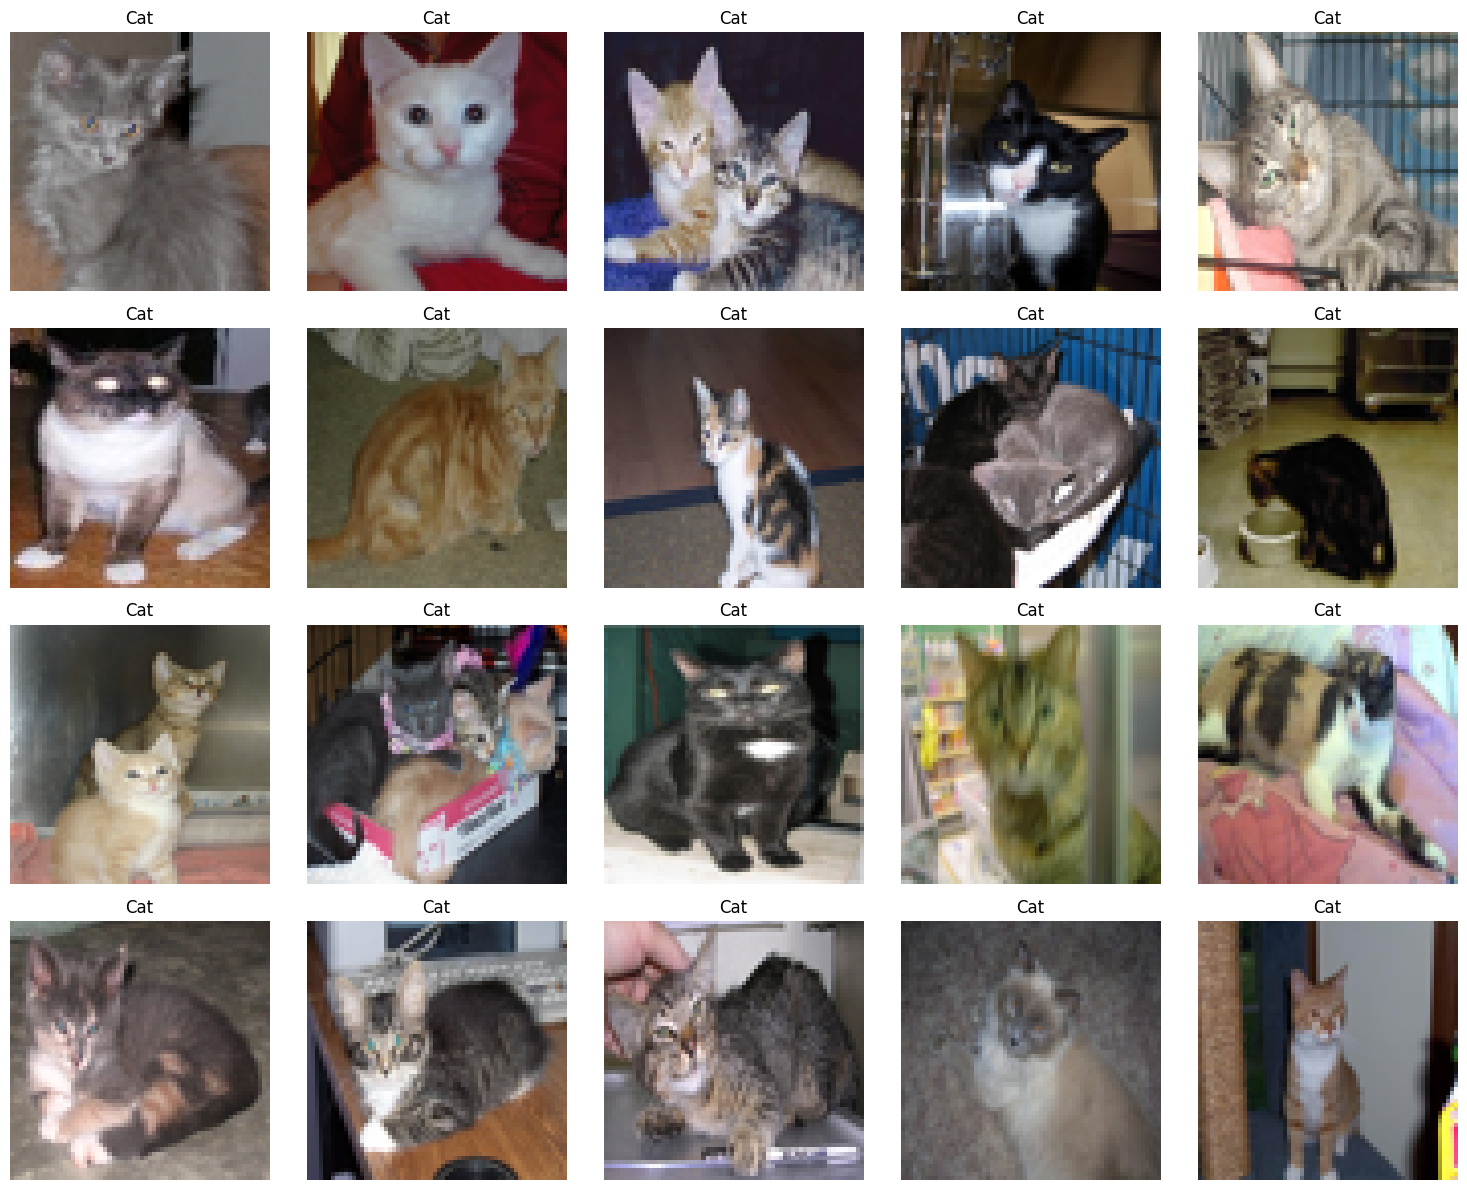

In [ ]:
# Filtrar solo imágenes de gatos
cat_images = images[labels == 0]
cat_labels = labels[labels == 0]

# Visualizar solo imágenes de gatos
visualize_images(cat_images, cat_labels, sample_count=20)

## Cargar y visualizar imágenes de perros.

Al igual que los gatos en esta sección solo se filtran las imágenes para los perros y luego visualizarlas con sus respectivas etiquetas en 20 imágenes.

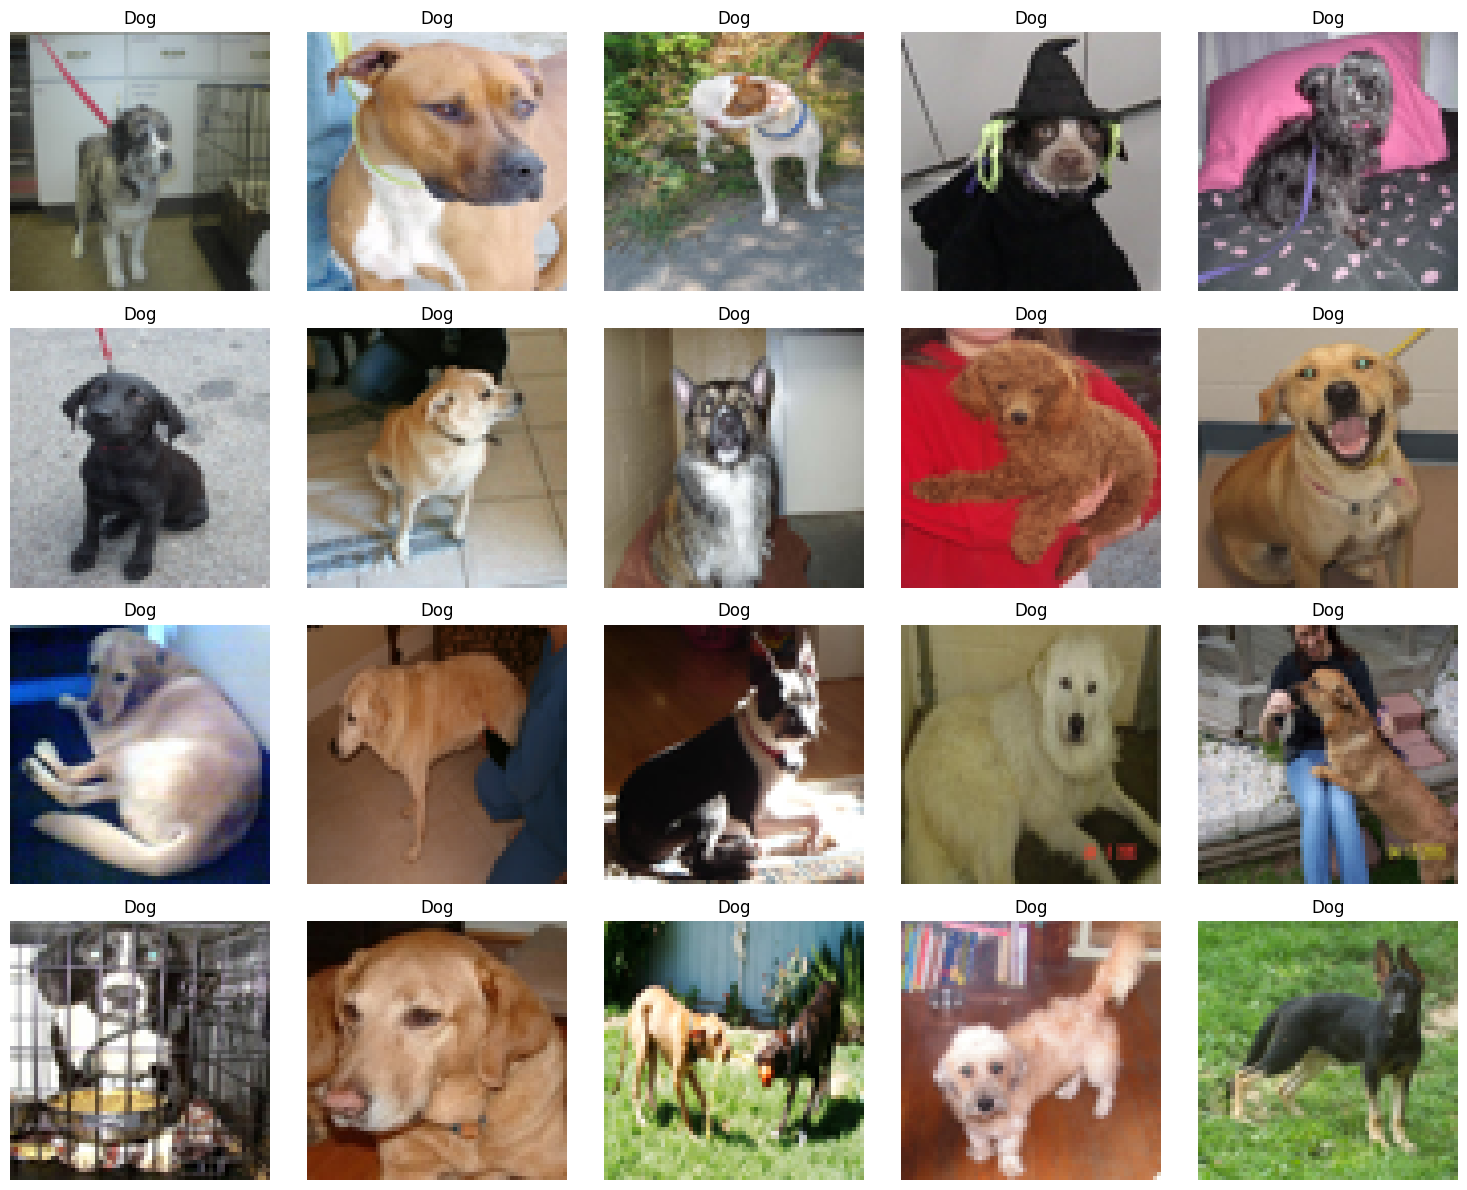

In [ ]:
# Filtrar solo imágenes de perros
dog_images = images[labels == 1]
dog_labels = labels[labels == 1]

# Visualizar solo imágenes de perros
visualize_images(dog_images, dog_labels, sample_count=20)

## Cargar y visualizar las imágenes de perros y gatos

En este bloque de código se crea una función para poder recorrer los subdirectorios de ambas datas de entrenamiento, donde se le agrega la opción de cargar imágenes del subdirectorio, para luego listar los archivos en dicho subdirectorio y barajarlos, incluyendo la normalización que va de 255 píxeles, luego de ello se realiza la mezcla de imágenes con las etiquetas juntas mostrando así las imágenes mezcladas tanto de perros como gatos, para luego cargar las imágenes y visualizarlas de ambos animales

Cargando imágenes desde el subdirectorio: cats
Cargando imágenes desde el subdirectorio: dogs
Images shape: (40, 64, 64, 3)
Labels shape: (40,)


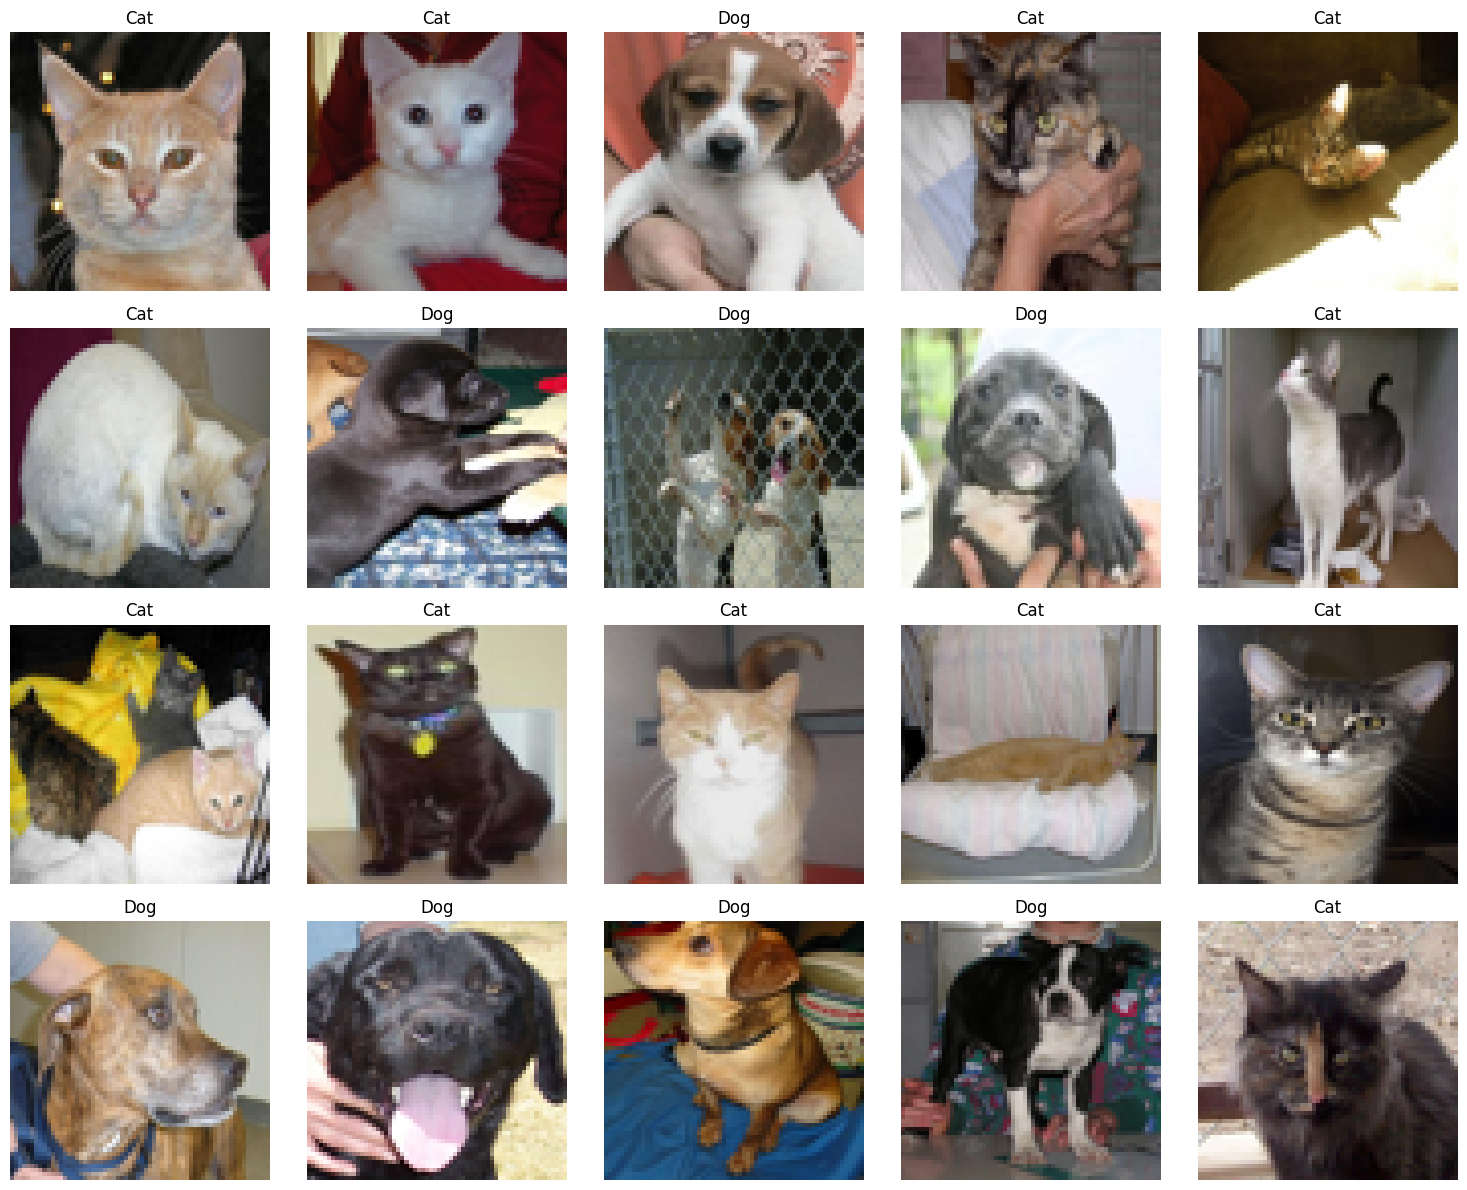

In [ ]:
def load_images_from_subdirectories(folder, img_size=(64, 64), sample_count=20):
    images = []
    labels = []

    # Recorrer subdirectorios
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)

        if os.path.isdir(subdir_path):
            print(f"Cargando imágenes desde el subdirectorio: {subdir}")

            # Listar archivos en el subdirectorio
            filenames = os.listdir(subdir_path)
            random.shuffle(filenames)  # Barajar archivos

            for img in filenames[:sample_count]:
                try:
                    img_path = os.path.join(subdir_path, img)
                    img_pil = Image.open(img_path).convert('RGB')
                    img_pil = img_pil.resize(img_size)
                    img_np = np.array(img_pil) / 255.0  # Normalizar valores de píxeles
                    images.append(img_np)
                    labels.append(0 if subdir == 'cats' else 1)
                except Exception as e:
                    print(f"Error cargando la imagen {img}: {e}")

    return np.array(images), np.array(labels)

def visualize_images_mixed(images, labels, sample_count=20):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    axes = axes.flatten()

    # Mezclar imágenes y etiquetas juntas
    combined = list(zip(images, labels))
    random.shuffle(combined)
    images, labels = zip(*combined)

    # Mostrar imágenes mezcladas
    for i in range(min(sample_count, len(images))):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')

    # Apagar ejes restantes
    for i in range(len(images), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Cargar imágenes
train_dir = '/content/extracted_files/dogvscat_small/train'  # Ajusta esta ruta según sea necesario
images, labels = load_images_from_subdirectories(train_dir, sample_count=20)
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

# Visualizar imágenes mezcladas
visualize_images_mixed(images, labels, sample_count=20)


# Cargando y preprocesando los datos de entrenamiento.

Este código crea una función "load_images" que carga imágenes desde un directorio, las redimensiona a un tamaño predeterminado (en este caso 64x64 píxeles), las almacena en un array junto con sus etiquetas. Los subdirectorios del directorio principal contienen las imágenes, cada uno de los cuales representa una clase (por ejemplo, "gato" o "perro"). La función explora cada subdirectorio, elige una muestra limitada de imágenes (hasta "muestra_cantidad") y asigna una etiqueta de cero o uno según el nombre del subdirectorio. Los valores de píxeles de las imágenes se dividen por 255 y se convierten en arrays numpy. Finalmente, el código imprime las formas de los arrays de imágenes y etiquetas para confirmar que se han cargado correctamente.

In [ ]:
def load_images(folder, img_size=(64, 64), sample_count=20):
    images = []
    labels = []

    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):
            filenames = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
            random.shuffle(filenames)
            for img in filenames[:min(sample_count, len(filenames))]:
                img_path = os.path.join(subdir_path, img)
                try:
                    img_np = np.array(Image.open(img_path).convert('RGB').resize(img_size))
                    images.append(img_np)
                    labels.append(0 if 'cat' in subdir.lower() else 1)
                except Exception as e:
                    print(f"Error cargando la imagen {img}: {e}")

    return np.array(images), np.array(labels)

# Especificar el directorio de entrenamiento
train_dir = '/content/extracted_files/dogvscat_small/train'

# Cargar imágenes
images, labels = load_images(train_dir, sample_count=10000)

# Normalizar valores de los píxeles
images = images / 255.0

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")


Images shape: (2000, 64, 64, 3)
Labels shape: (2000,)


## Mostrar la forma de la matriz de imágenes.

Esta línea de código imprime la forma del array de las imágenes  lo que mostrará las dimensiones de la array que normalmente estarán en el formato número de imágenes, altura, ancho y canales, donde el número de imágenes es la cantidad total de imágenes cargadas, altura y ancho son las dimensiones de cada imagen 64x64 en este caso y canales es el número de canales de color (3 para imágenes RBG)

In [ ]:
print("Shape of images array:", images.shape)

Shape of images array: (2000, 64, 64, 3)


## Mostrar la forma de la primera imagen.

En este caso, esta línea se utiliza para imprimir la forma de la primera imagen en el array, lo que nos mostrará las dimensiones de la primera imagen que debería ser altura, ancho y canales, donde altura y ancho son las dimensiones de la imagen que también son 64x64 y los canales es el número los canales de color que también son de 3 para imágenes RBG, por ejemplo si se ha cargado las imágenes de 64x64 píxeles en RBG deberíamos ver la salida de dichas dimensiones.

In [ ]:
print("Shape of the first image:", images[0].shape)

Shape of the first image: (64, 64, 3)


# Definición del modelo

En este bloque de código se define y compila un modelo de red neuronal convolucional (CNN) utilizando TensorFlow y Keras, este modelo está compuesto por cuatro capas convolucionales (Conv2D) con filtros de 32, 64 y 128, seguidas de capas de agrupación (Maxpooling2D), que extraen características de imagen de tamaño 150x150 píxeles, tras las capas convolucionales el modelo aplanará las salidas (flatten) lo que pasará por dos capas densas con 512 y 256 neuronas y una activación ReLU, lo que aplicará una capa de dropout para reducir el sobreajuste y finalmente la capa de salida utiliza una neurona con activación sigmoide para realizar la clasificación binaria, el modelo se compila con el optimizador Ada ya que indica la pérdida de entropía cruzada binaria y se evalúa con la métrica de precisión.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Construir la CNN utilizando Sequential
model = models.Sequential()

# Primera capa de convolución y agrupación
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa de convolución y agrupación
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa de convolución y agrupación
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Cuarta capa de convolución y agrupación
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar y añadir capas completamente conectadas
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Ayuda a prevenir el sobreajuste
model.add(layers.Dense(256, activation='relu'))  # Capa adicional según el primer código
model.add(layers.Dense(1, activation='sigmoid'))  # Salida binaria

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,681,345 (21.67 MB)

 Trainable params: 5,681,345 (21.67 MB)

 Non-trainable params: 0 (0.00 B)

## Generador de datos

Seguidamente en este código se configura y crea generadores de datos para el entrenamiento y validación del modelo de aprendizaje, donde se define los directorios que contienen las imágenes para el entrenamiento, validación y prueba, ya que utiliza (ImagenDataGenerator) de Keras para normalizar las imágenes escalando los valores de píxeles entre 0 y 1 y redimensionando las imágenes a 150x150 píxeles, donde luego crea un generador de datos para el entrenamiento y otro para la validación, ambos configurados para clasificar las imágenes en dos clases, estos generadores cargan imágenes en lotes de 20 y permiten que el modelo se entrene y valide con imágenes preprocesadas y agrupadas.

In [ ]:
# Directorios para los datos
base_dir = '/content/extracted_files/dogvscat_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Creación de generadores de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Generador de datos para entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,                  # Directorio de imágenes de entrenamiento
    target_size=(150, 150),     # Redimensionar las imágenes a 150x150 píxeles
    batch_size=20,              # Número de imágenes por lote
    class_mode='binary'         # Clasificación binaria: perro o gato
)

# Generador de datos para validación
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,             # Directorio de imágenes de validación
    target_size=(150, 150),     # Redimensionar las imágenes a 150x150 píxeles
    batch_size=20,              # Número de imágenes por lote
    class_mode='binary'         # Clasificación binaria: perro o gato
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Entrenamiento

Asímismo, en este código se entrena el modelo de la red neuronal utilizando los generadores de datos ya definidos previamente, donde la función (fit) ajusta el modelo a los datos de entrenamiento (train_generator) durante 20 épocas, dado que durante el entrenamiento también evalúa el rendimiento del modelo en un conjunto de datos de validación en cada época, el argumento (verbose=1) muestra información detallada sobre el progreso del entrenamiento, donde incluye la pérdida y precisión de cada época establecida, este proceso nos permite que el modelo aprenda a clasificar las imágenes basándose en los datos proporcionados y ajustar sus parámetros para mejorar su rendimiento.

In [ ]:
# Entrenar el modelo usando generadores
history = model.fit(
    train_generator,             # Generador de datos de entrenamiento
    epochs=20,
    validation_data=validation_generator,  # Generador de datos de validación
    verbose=1
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.8502 - loss: 0.3637 - val_accuracy: 0.7380 - val_loss: 0.6133
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8841 - loss: 0.2701 - val_accuracy: 0.7320 - val_loss: 0.6362
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9025 - loss: 0.2275 - val_accuracy: 0.6990 - val_loss: 0.8567
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9248 - loss: 0.1737 - val_accuracy: 0.6930 - val_loss: 0.9553
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9557 - loss: 0.1156 - val_accuracy: 0.6910 - val_loss: 1.4298
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9725 - loss: 0.0905 - val_accuracy: 0.7480 - val_loss: 1.1959
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9725 - loss: 0.0685 - val_accuracy: 0.7250 - val_loss: 1.3680
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9813 - loss: 0.0600 - val_accu

## Rendimiento del modelo

El código realiza la visualización de precisión y la pérdida del modelo durante el proceso de entrenamiento y validación, donde primero extrae las métricas de precisión y pérdida del objeto obtenido durante el entrenamiento realizado, luego genera dos gráficos utilizando la librería correspondiente mostrando la precisión de entrenamiento y validación a lo largo de las 20 épocas en primer gráfico y en el segundo gráfico la pérdida de entrenamiento y la validación, asímismo, se utilizan puntos azules para la precisión y las líneas azules para la pérdida con etiquetas adecuadas para los ejes y una leyenda para identificar cada línea correspondiente al gráfico.

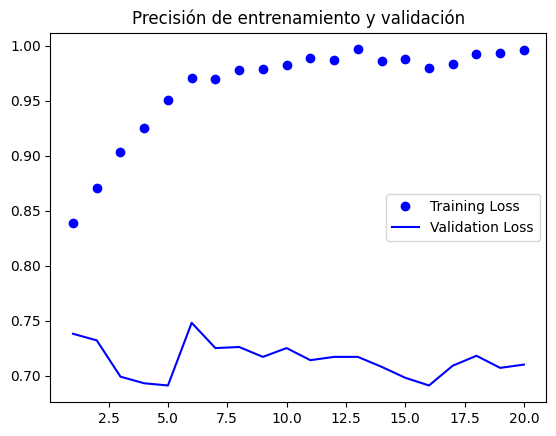

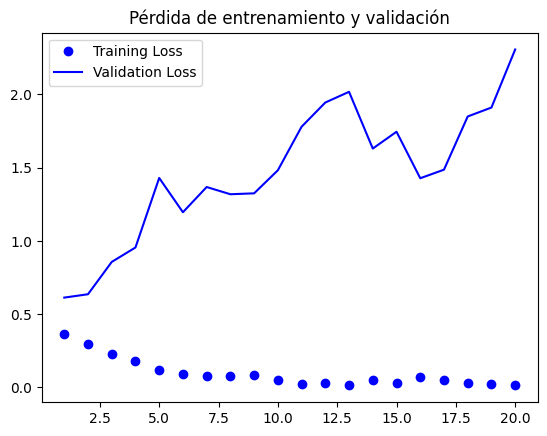

In [ ]:
import matplotlib.pyplot as plt

# Mostrar la precisión de entrenamiento y validación
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Mostrar la pérdida de entrenamiento y validación
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Loss')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Precisión de entrenamiento y validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Pérdida de entrenamiento y validación')
plt.legend()

plt.show()


## Aumento de datos

En este bloque de código se define y entrena un modelo de reunión neuronal CNN para clasificar las imágenes con un aumento de datos, donde primero se construye un modelo secuencial con varias capas de convolución y agrupación, seguido por capas completamente conectadas y lo compila con el optimizador Adam y la función de pérdida, luego se prepara los generadores de datos utilizando (ImagenDataGenerator) para realizar el entrenamiento con el respectivo aumento de datos, como rotación desplazamiento y zoom, mientras que los datos de validación se escalan sin aumentos, además, de crear generadores de datos para el entrenamiento y validación a partir de los directorios de las imágenes, para luego entrenar el modelo usando estos generadores durante 60 épocas especificando el número de pasos por épocas  y validación, asimismo, muestras del progreso en el entrenamiento.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir el modelo
model_aug = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2), name='maxpool_1'),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'),
    layers.MaxPooling2D((2, 2), name='maxpool_2'),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'),
    layers.MaxPooling2D((2, 2), name='maxpool_3'),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_4'),
    layers.MaxPooling2D((2, 2), name='maxpool_4'),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', name='dense_1'),
    layers.Dense(256, activation='relu', name='dense_2'),
    layers.Dense(1, activation='sigmoid', name='output')
])

# Compilar el modelo
model_aug.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preparar generadores de datos con aumento de datos para el entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generador para datos de validación (sin aumento de datos)
test_datagen = ImageDataGenerator(rescale=1./255)

# Crear generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Entrenamiento del modelo
history_aug = model_aug.fit(
    train_generator,                 # Generador de datos para entrenamiento
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Número de pasos por época
    epochs=60,                       # Número total de épocas
    validation_data=validation_generator,  # Generador de datos para validación
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # Número de pasos de validación
    verbose=1                       # Mostrar barra de progreso
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.5167 - loss: 0.6974 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6250 - loss: 0.6887 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 3/60


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.4897 - loss: 0.6949 - val_accuracy: 0.5010 - val_loss: 0.6932
Epoch 4/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3125 - loss: 0.6976 - val_accuracy: 0.3750 - val_loss: 0.6958
Epoch 5/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.5059 - loss: 0.6929 - val_accuracy: 0.4980 - val_loss: 0.6933
Epoch 6/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5625 - loss: 0.6916 - val_accuracy: 0.7500 - val_loss: 0.6866
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.4891 - loss: 0.6934 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 8/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6250 - loss: 0.6921 - val_accuracy: 0.6250 - val_loss: 0.6920
Epoch 9/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.4778 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 10/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 319ms/step - accuracy: 0.4375 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.

## Guardar el Modelo y el Historial

Este código guarda el modelo entrenado y el historial de entrenamiento en archivos, donde primero utiliza el método SAVE de Keras para guardar el modelo en un archivo hdf5 llamado (model_aug.h5), donde luego define una función (history) que guarda todo el historial del entrenamiento que contiene los registros de precisión y pérdida que se presentaron durante el entrenamiento, para luego guardarlos en un archivo binario utilizando pickle y finalmente llamar a esta función para guardar la historia de entrenamiento en el archivo.

In [ ]:
import pickle

# Guardar el modelo
model_aug.save('model_aug.h5')

# Guardar el historial del entrenamiento
def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)

# Guardar historial
save_history(history_aug, 'history_aug.bin')

## Modelo actualizado

Seguidamente en este bloque de código carga el historial de entrenamiento guardado previamente, desde un archivo binario y lo utiliza para graficar el rendimiento del modelo actualizado, primero define la función del (lead_history)que lee el archivo guardado usando pickle para recuperar el historial de entrenamiento, luego define la función de (plot_compare) para crear los gráficos, donde uno muestre la precisión y el otro la pérdida del modelo a lo largo de la 60 épocas establecidas, en el gráfico de precisión se muestran las curvas para la precisión en el entrenamiento y validación, mientras que en el gráfico de pérdidas se muestra las curvas para la pérdida del entrenamiento y validación y finalmente llamar a (plot_compare) para visualizar el rendimiento del modelo actualizado.

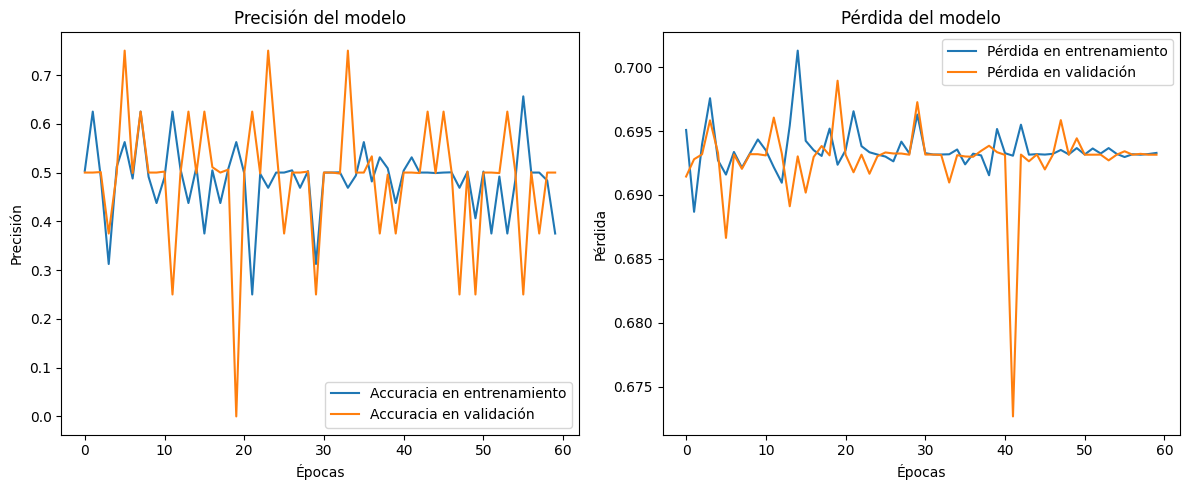

In [ ]:
import matplotlib.pyplot as plt
import pickle

# Cargar el historial
def load_history(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Cargar historial
history_aug = load_history('history_aug.bin')

# Función para graficar el rendimiento
def plot_compare(history, steps=50):
    # Graficar la precisión
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Accuracia en entrenamiento')
    plt.plot(history['val_accuracy'], label='Accuracia en validación')
    plt.title('Precisión del modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Graficar la pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Pérdida en entrenamiento')
    plt.plot(history['val_loss'], label='Pérdida en validación')
    plt.title('Pérdida del modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Graficar el rendimiento
plot_compare(history_aug)


## Modelo VGG

Utilizando la función "VGG16" de "tensorflow.keras.applications", este código carga el modelo VGG16 preentrenado. En el conjunto de datos ImageNet se cargan los pesos previamente entrenados al especificar "weights='imagenet". Las capas convolucionales y de agrupación son las únicas capas que se incluirán al final del modelo si se selecciona la opción "include_top=False". Para usar VGG16 como extractor de características en lugar de un clasificador completo, esto es útil. "vgg.summary()" muestra un resumen de la arquitectura del modelo y proporciona información sobre las capas y parámetros del modelo.

In [ ]:
from tensorflow.keras.applications import VGG16

# Cargar el modelo VGG16 preentrenado sin la capa superior (fully connected layers)
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Mostrar un resumen de la arquitectura del modelo
vgg.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# Visualización

## Visualización de mapas de características

Este código realiza las siguientes tareas, donde primero recopila todas las imágenes en un directorio de prueba y su subdirectorios, para luego seleccionar una imagen aleatoria de la lista, donde la imagen seleccionada se carga y se redimensiona a 150x150 píxeles y se convierte en una array de Numpy, ya que se expande para añadir una dimensión de batch y se normaliza dividiendo los valores de los píxeles por 255 para finalmente imprimir la ruta de la imagen y la forma del tensor de la imagen, además la imagen seleccionada se muestra con los ejes desactivados para una visualización más limpia.

Imagen seleccionada: /content/extracted_files/dogvscat_small/test/cats/1713.jpg
Forma del tensor de la imagen: (1, 150, 150, 3)


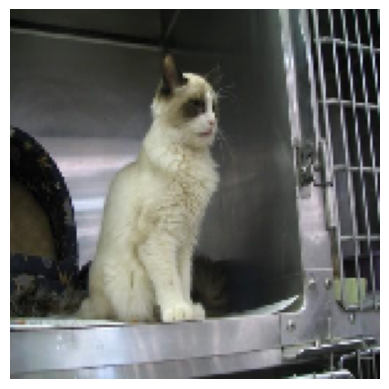

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Directorio de las imágenes de prueba
test_dir = '/content/extracted_files/dogvscat_small/test'

# Obtener una lista de todas las imágenes en el directorio de prueba
all_images = []
for subdir in os.listdir(test_dir):
    subdir_path = os.path.join(test_dir, subdir)
    if os.path.isdir(subdir_path):  # Verificar si es un subdirectorio
        images_in_subdir = os.listdir(subdir_path)
        all_images.extend([os.path.join(subdir_path, img) for img in images_in_subdir])

# Seleccionar una imagen aleatoria de la lista de imágenes
random_image_path = np.random.choice(all_images)

# Cargar y preprocesar la imagen
img = image.load_img(random_image_path, target_size=(150, 150))  # Cargar imagen con tamaño objetivo
img_tensor = image.img_to_array(img)  # Convertir imagen a un array de NumPy
img_tensor = np.expand_dims(img_tensor, axis=0)  # Añadir una dimensión para el batch
img_tensor /= 255.  # Normalizar los valores de los píxeles

# Imprimir la forma del tensor
print(f"Imagen seleccionada: {random_image_path}")
print(f"Forma del tensor de la imagen: {img_tensor.shape}")

# Visualizar la imagen
plt.imshow(img_tensor[0])  # Mostrar la primera (y única) imagen del batch
plt.axis('off')  # No mostrar los ejes
plt.show()


Este código extrae y muestra las activaciones de las capas convolucionales de una imagen específica utilizando el modelo VGG16 preentrenado, excluyendo la capa superior. Se carga el modelo y se crea un nuevo modelo ("activation_model") para obtener las salidas de las capas convolucionales. Luego se obtienen las activaciones intermedias para la imagen y se visualizan los mapas de características de la primera capa convolucional, mostrando los filtros detectados en la imagen con el colormap "viridis", lo que permite observar cómo la primera capa del modelo responde a las características visuales de la imagen.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


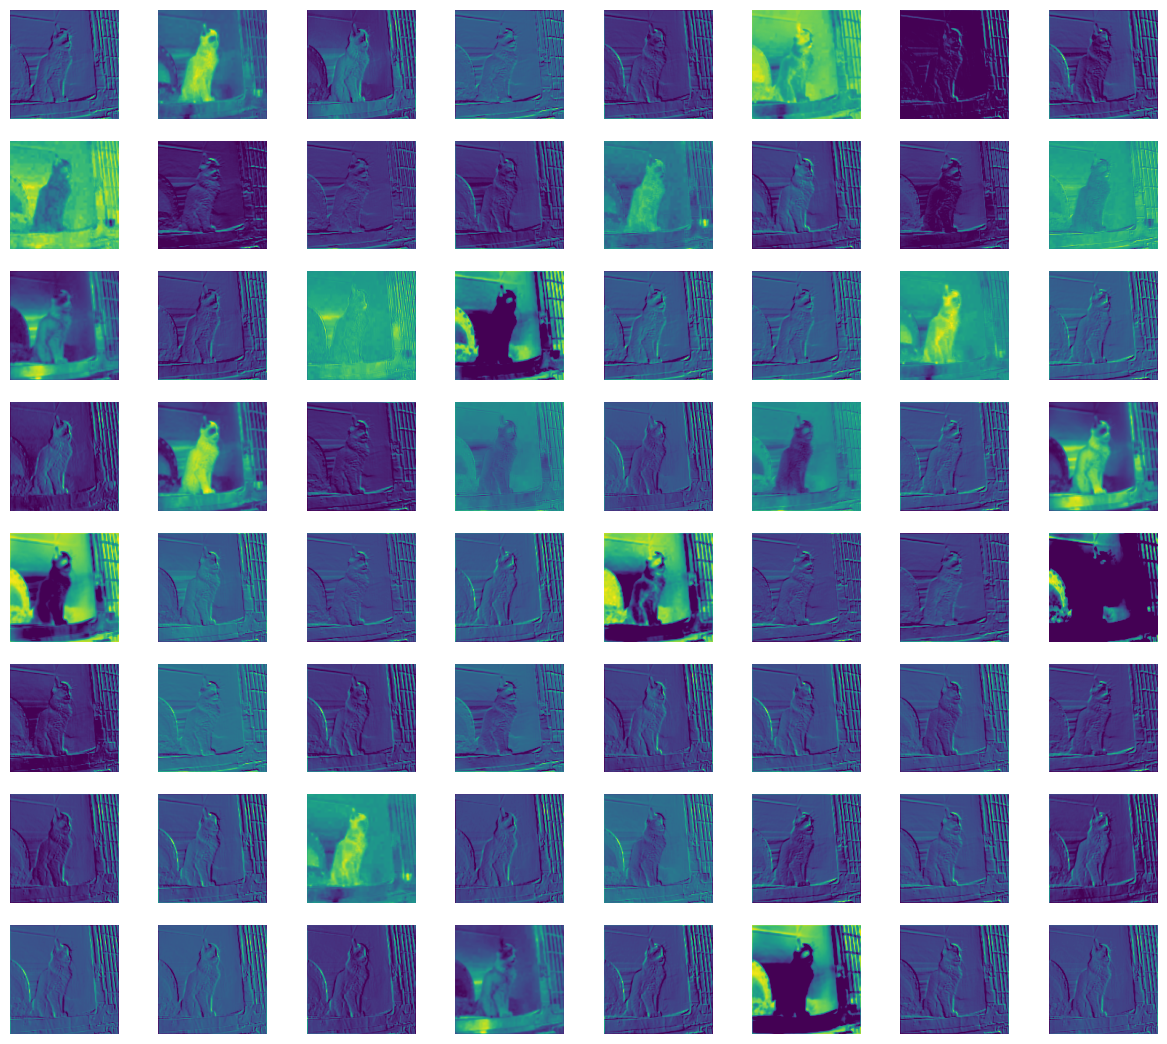

In [ ]:
# Ahora usar esta misma imagen para obtener las activaciones de VGG16

# Cargar el modelo VGG16 preentrenado sin la capa superior
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Definir el modelo para extraer las activaciones de las capas convolucionales
layer_outputs = [layer.output for layer in vgg.layers if 'conv' in layer.name]
activation_model = Model(inputs=vgg.input, outputs=layer_outputs)

# Obtener las activaciones intermedias
intermediate_activations = activation_model.predict(img_tensor)

# Visualizar los mapas de características de la primera capa convolucional
first_layer_activation = intermediate_activations[0]
num_filters = first_layer_activation.shape[-1]

plt.figure(figsize=(15, 15))
for i in range(num_filters):
    plt.subplot(num_filters // 8 + 1, 8, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

##Visualización de filtros de Convnet

Este código carga el modelo VGG16 previamente entrenado sin la capa superior y muestra los filtros de la primera capa convolucional. Primero, se accede a la capa convolucional inicial de VGG16 y se calculan sus pesos, que corresponden a los filtros de la capa. Luego se normalizan los filtros para garantizar que sus valores estén en el rango [0, 1] para una mejor visualización. Finalmente, se utiliza el colormap "viridis" para crear subgráficas para cada filtro. Esto demuestra cómo se ven los filtros aprendidos por la red en la primera capa convolucional.

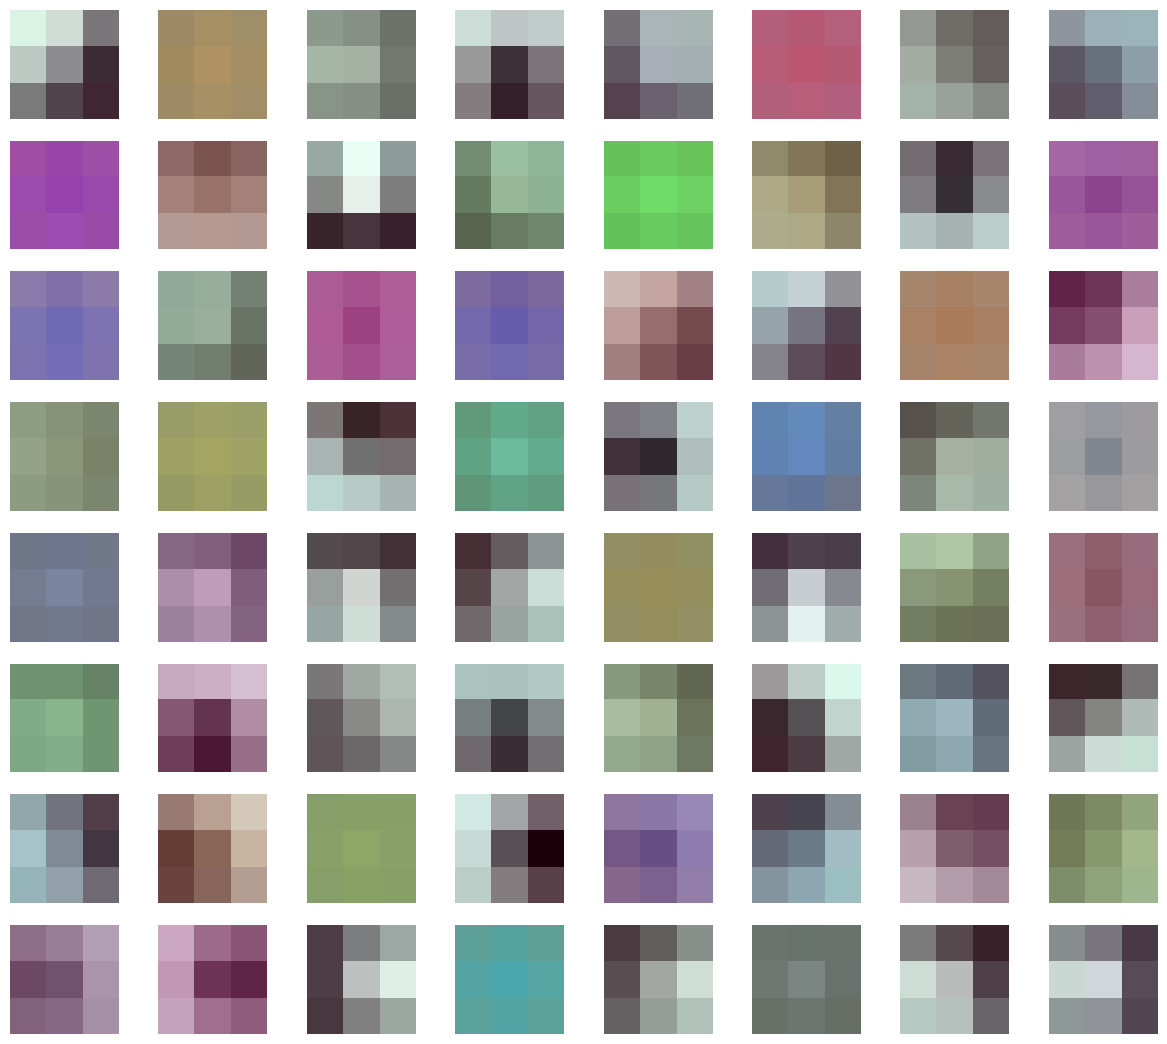

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16

# Cargar el modelo VGG16 preentrenado sin la capa superior
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Seleccionar la primera capa convolucional
first_conv_layer = vgg.layers[1]  # Capa Conv2D de VGG16

# Obtener los filtros de la capa
filters, biases = first_conv_layer.get_weights()

# Normalizar los filtros para la visualización
filters = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))

# Visualizar los filtros
num_filters = filters.shape[3]
plt.figure(figsize=(15, 15))
for i in range(num_filters):
    plt.subplot(num_filters // 8 + 1, 8, i + 1)
    plt.imshow(filters[:, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

## Visualización de Salida de la Clase

Este código utiliza el modelo VGG16 preentrenado para clasificar una imagen y mostrar la raza detectado para determinar si es un gato o un perro. Primero, se agregan pesos de ImageNet al modelo VGG16. La imagen se carga, se redimensiona a 224 x 224 píxeles, se convierte en un tensor y se preprocesa de acuerdo con las especificaciones del modelo. Después de eso, se hace una predicción y se decodifican las tres categorías más probables. El nombre y la raza del animal se asignan basándose en la predicción si la imagen indica que es un gato o un perro. Finalmente, se muestra la imagen junto con el resultado de la predicción, o el primer resultado de la predicción si no se identifica claramente como un gato o un perro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1: dishwasher (0.35)
2: lynx (0.19)
3: Siamese_cat (0.14)


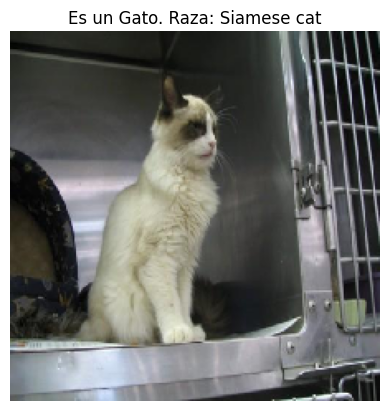

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

# Cargar el modelo VGG16 preentrenado con la capa superior
vgg = VGG16(weights='imagenet')

# Ruta de la imagen (debe estar definida previamente o seleccionada aleatoriamente)
img_path = random_image_path  # Asegúrate de especificar la ruta correcta

# Cargar y preprocesar la imagen
img = image.load_img(img_path, target_size=(224, 224))  # Tamaño esperado por VGG16
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

# Realizar la predicción
predictions = vgg.predict(img_tensor)

# Decodificar y mostrar la predicción
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Mostrar las predicciones decodificadas
for i, (class_id, class_name, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {class_name} ({score:.2f})")

# Determinar si la imagen es de un gato o un perro y mostrar la raza
animal = None
raza = None
for _, class_name, _ in decoded_predictions:
    if 'cat' in class_name.lower():
        animal = 'Gato'
        raza = class_name.replace('_', ' ')
        break
    elif 'dog' in class_name.lower():
        animal = 'Perro'
        raza = class_name.replace('_', ' ')
        break

# Mostrar la imagen junto con la predicción
plt.imshow(img)
plt.axis('off')
if animal:
    plt.title(f"Es un {animal}. Raza: {raza}")
else:
    # Si no es claramente un perro o un gato, mostrar el primer resultado de la predicción
    titulo = decoded_predictions[0][1].replace('_', ' ')
    plt.title(f"Predicción: {titulo}")
plt.show()




Podemos concluir que la clasificación se hizo correctamente, además,  indicar que el modelo sí cumple con el objetivo de identificar y predecir a los gatos y perros, pero con única diferencia que para predecir a los perros solamente nos proporciona la raza al que pertenece y no afirma el hecho que sea un perro en cuanto al gato si nos proporciona tanto la afirmación de que es un gato juntamente con su raza.